<a href="https://colab.research.google.com/github/22083111/FACIAL-AGE-PROGRESSION-AND-REGRESSION-USING-NEURAL-NETWORKS-and-GAN-s/blob/main/initial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')


ValueError: Mountpoint must not already contain files

In [ ]:
import os
import shutil
from collections import defaultdict

# Source folder path
source_folder = "/content/drive/MyDrive/nikhil/data/all_images"

# Destination folder path
destination_folder = "/content/drive/MyDrive/nikhil/best_images/"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Dictionary to track the count of images per age
age_image_count = defaultdict(int)
max_images_per_age = 20

# Copy images up to the limit per age
for file_name in os.listdir(source_folder):
    try:
        # Parse the age from the file name
        age = int(file_name.split('_')[0])

        # Check if the age has already reached the limit
        if age_image_count[age] < max_images_per_age:
            src_path = os.path.join(source_folder, file_name)
            dest_path = os.path.join(destination_folder, file_name)
            shutil.copy(src_path, dest_path)
            age_image_count[age] += 1
    except Exception as e:
        # Skip files that can't be processed
        continue

print(f"Copied {len(os.listdir(destination_folder))} images to {destination_folder}")


Copied 1876 images to /content/drive/MyDrive/nikhil/best_images/


In [ ]:
# Path to the curated folder
dataset_path = "/content/drive/MyDrive/nikhil/best_images/"


In [ ]:
import os
import cv2
import numpy as np

# Path to the curated folder
dataset_path = "/content/drive/MyDrive/nikhil/best_images/"

# Initialize lists to store data and labels
images = []
ages = []

# Load images and labels
for file_name in os.listdir(dataset_path):
    try:
        # Parse the age from the file name
        age = int(file_name.split('_')[0])

        # Load the image
        img_path = os.path.join(dataset_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img_resized = cv2.resize(img, (64, 64))  # Resize to a fixed size

        images.append(img_resized)
        ages.append(age)
    except:
        continue

# Convert to numpy arrays
images = np.array(images)
ages = np.array(ages)
print(f"Loaded {images.shape[0]} images.")


Loaded 1874 images.


Visualizing some sample images:


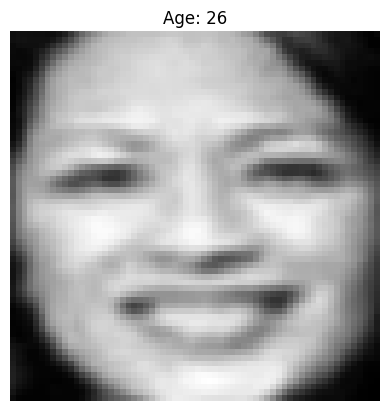

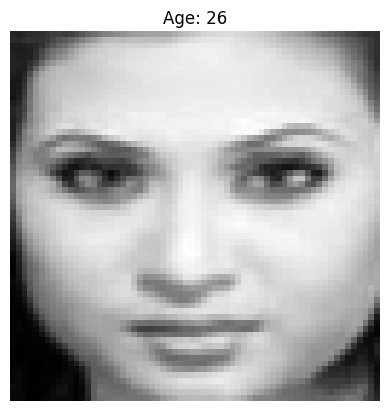

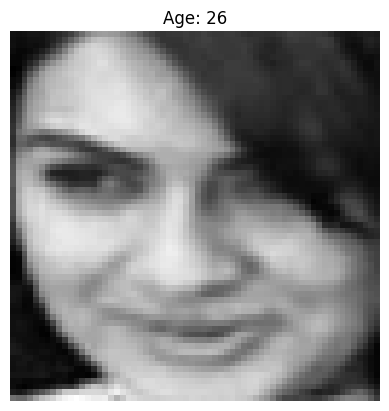

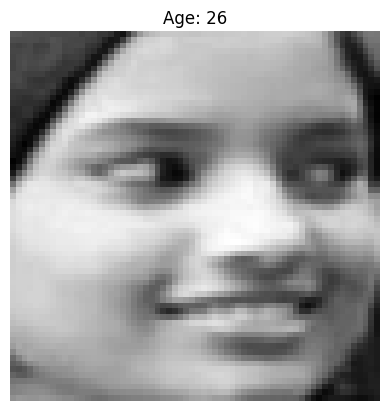

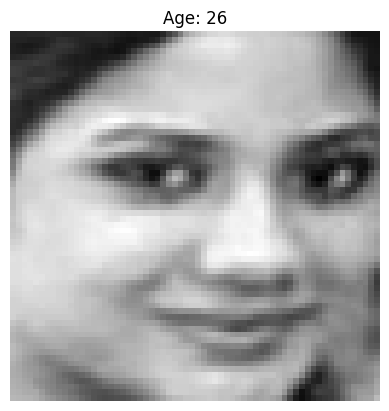

Preprocessed data saved as preprocessed_data.pkl
Training samples: 1500, Testing samples: 376


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib

# Normalize the image data to [0, 1]
images = images / 255.0

# Reshape the data
# For machine learning models (flatten images)
X = images.reshape(images.shape[0], -1)  # Shape: (1876, 64*64)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ages, test_size=0.2, random_state=42)

# Visualize a few samples
print("Visualizing some sample images:")
for i in range(5):
    plt.imshow(images[i].reshape(64, 64), cmap='gray')
    plt.title(f"Age: {ages[i]}")
    plt.axis('off')
    plt.show()

# Save preprocessed data
joblib.dump((X_train, X_test, y_train, y_test), "preprocessed_data.pkl")
print("Preprocessed data saved as preprocessed_data.pkl")

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


In [ ]:
import joblib
X_train, X_test, y_train, y_test = joblib.load("preprocessed_data.pkl")


In [ ]:
from imblearn.over_sampling import SMOTE

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_cnn.reshape(len(X_train_cnn), -1), y_train)
X_train_balanced = X_train_balanced.reshape(-1, 64, 64, 1)  # Reshape back to 4D

# Ensure pixel values are normalized between 0 and 1 (already done during preprocessing)
print(f"Training data shape: {X_train_cnn.shape}")
print(f"Testing data shape: {X_test_cnn.shape}")


Training data shape: (1500, 64, 64, 1)
Testing data shape: (376, 64, 64, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the CNN model with regularization
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Add L2 regularization
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Add L2 regularization
    Dropout(0.5),
    Dense(1)  # Single output for regression
])


# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Summary of the model
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,705 (6.20 MB)

 Trainable params: 1,624,705 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on the training data
datagen.fit(X_train_cnn)

# Train the model using augmented data
history = cnn_model.fit(
    datagen.flow(X_train_balanced, y_train_balanced, batch_size=32),
    validation_data=(X_test_cnn, y_test),
    epochs=50
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - loss: 1439.3595 - mae: 30.6779 - val_loss: 843.8115 - val_mae: 24.8163
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - loss: 911.3914 - mae: 25.2854 - val_loss: 1117.5851 - val_mae: 28.5917
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - loss: 775.2731 - mae: 23.3495 - val_loss: 847.7346 - val_mae: 24.7782
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - loss: 810.3847 - mae: 23.7463 - val_loss: 851.8768 - val_mae: 24.5473
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - loss: 752.6816 - mae: 22.8283 - val_loss: 709.7103 - val_mae: 22.2477
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - loss: 727.2054 - mae: 22.3516 - val_loss: 629.9411 - val_mae: 20.7881
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - loss: 707.7521 - mae: 21.9139 - val_loss: 825.3858 - val_mae: 23.8624
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - loss: 709.1580 - mae: 22.2106 - val_loss: 648.8899 - val_mae: 20.8764
Epoch 9/50

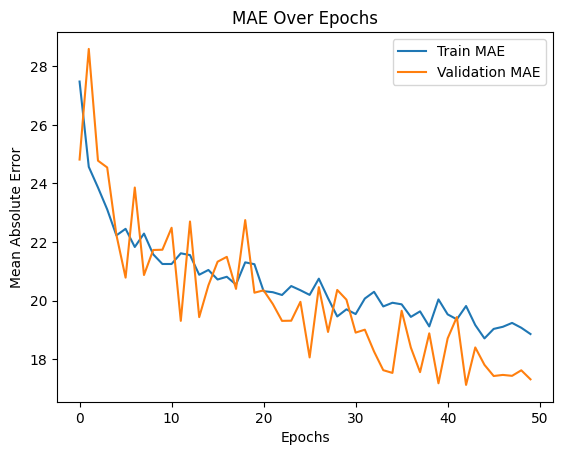

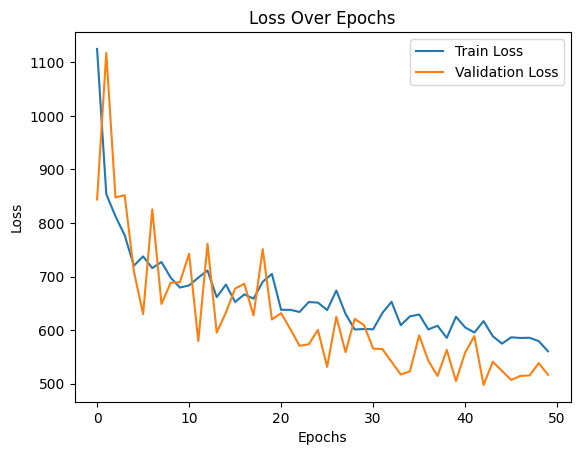

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Over Epochs')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
# Predict on test data
y_pred = cnn_model.predict(X_test_cnn)

# Display a few predictions
for i in range(5):
    print(f"Actual Age: {y_test[i]}, Predicted Age: {y_pred[i][0]:.2f}")

cnn_model.save('age_prediction_cnn_augmented.h5')
print("Model saved as age_prediction_cnn_augmented.h5")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


Actual Age: 67, Predicted Age: 59.59
Actual Age: 77, Predicted Age: 65.51
Actual Age: 68, Predicted Age: 59.05
Actual Age: 49, Predicted Age: 49.01
Actual Age: 83, Predicted Age: 53.97
Model saved as age_prediction_cnn_augmented.h5


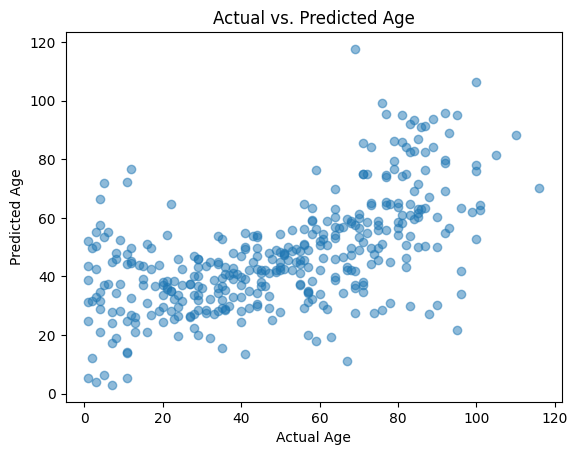

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs. Predicted Age")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random

# Function to display images with actual and predicted ages
def display_predictions(cnn_model, X_test, y_test, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        # Randomly select an index
        idx = random.randint(0, len(X_test) - 1)

        # Get the actual and predicted age
        actual_age = y_test[idx]
        predicted_age = cnn_model.predict(X_test[idx].reshape(1, 64, 64, 1))[0][0]

        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
        plt.title(f"Actual: {actual_age}\nPredicted: {predicted_age:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display predictions
display_predictions(cnn_model, X_test_cnn, y_test, num_images=5)


In [ ]:
import os
import cv2
import numpy as np
from sklearn import metrics
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

#######################################################################################################################
# Initialisation
#######################################################################################################################
# Path to the images
path = dataset_path
# Initialize as lists, not NumPy arrays
# Initialize as lists, not NumPy arrays
ages = []
genders = []
images = []

# For each image in the directory
for image in os.listdir(path):
    try:
        # Split the filename into components
        parts = image.split("_")

        # Ensure there are at least two parts for age and gender
        if len(parts) < 2:
            print(f"Skipping file due to invalid format: {image}")
            continue

        # Extract age and gender
        age = int(parts[0])
        gender = int(parts[1])

        # Read and resize the image
        image_data = cv2.imread(os.path.join(path, image))
        if image_data is None:
            print(f"Skipping file due to unreadable image: {image}")
            continue
        image_data = cv2.resize(image_data, (200, 200))

        # Add each element to their corresponding list
        ages.append(age)
        genders.append(gender)
        images.append(image_data)

    except ValueError as e:
        print(f"Skipping file due to error: {image} - {e}")
        continue

# Convert lists to NumPy arrays
ages = np.array(ages, dtype=np.int64)
genders = np.array(genders, dtype=np.uint8)
images = np.array(images)

# Debugging output
print(f"Processed {len(images)} images.")
print(f"Ages shape: {ages.shape}")
print(f"Genders shape: {genders.shape}")
print(f"Images shape: {images.shape}")

# We then split the data in train & test categories
# One for age and the other for gender because the predicted output is not the same
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, ages ,random_state=42)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, genders, random_state=42)

#######################################################################################################################
# Models
#######################################################################################################################
def run_age_model(nb_epochs, run):
    if run:
        # We create the age model
        age_model = Sequential()

        # We start with 2D Convolution, 128 nodes and ReLU activations up to 512 nodes
        age_model.add(Conv2D(128, kernel_size=3, activation="relu", input_shape=(200, 200, 3)))
        age_model.add(MaxPool2D(pool_size=3, strides=2))

        age_model.add(Conv2D(128, kernel_size=3, activation="relu"))
        age_model.add(MaxPool2D(pool_size=3, strides=2))

        age_model.add(Conv2D(256, kernel_size=3, activation="relu"))
        age_model.add(MaxPool2D(pool_size=3, strides=2))

        age_model.add(Conv2D(512, kernel_size=3, activation="relu"))
        age_model.add(MaxPool2D(pool_size=3, strides=2))

        age_model.add(Flatten())
        age_model.add(Dropout(0.2))
        age_model.add(Dense(512, activation="relu"))

        # Output is only 1 node (age)
        age_model.add(Dense(1, activation="linear", name="age"))

        # Regression problem -> mse loss
        age_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

        print(age_model.summary())

        age_model.fit(x_train_age, y_train_age, validation_data=(x_test_age, y_test_age), epochs=nb_epochs)

        # Save the model so we don't always have to run it
        age.model.save("age_model.keras")

def run_gender_model(nb_epochs, run):
    if run:
        # We create the gender model
        gender_model = Sequential()

        # We start with 2D Convolution, 36 nodes and ReLU activations up to 512 nodes
        gender_model.add(Conv2D(36, kernel_size=3, activation="relu", input_shape=(200, 200, 3)))
        gender_model.add(MaxPool2D(pool_size=3, strides=2))

        gender_model.add(Conv2D(64, kernel_size=3, activation="relu"))
        gender_model.add(MaxPool2D(pool_size=3, strides=2))

        gender_model.add(Conv2D(128, kernel_size=3, activation="relu"))
        gender_model.add(MaxPool2D(pool_size=3, strides=2))

        gender_model.add(Conv2D(256, kernel_size=3, activation="relu"))
        gender_model.add(MaxPool2D(pool_size=3, strides=2))

        gender_model.add(Conv2D(512, kernel_size=3, activation="relu"))
        gender_model.add(MaxPool2D(pool_size=3, strides=2))

        gender_model.add(Flatten())
        gender_model.add(Dropout(0.2))
        gender_model.add(Dense(512, activation="relu"))

        # Output is only 1 node (gender)
        gender_model.add(Dense(1, activation="sigmoid", name="gender"))

        # Classification problem -> binary crossentropy loss
        gender_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

        print(gender_model.summary())

        gender_model.fit(
            x_train_gender,
            y_train_gender,
            validation_data=(x_test_gender, y_test_gender),
            epochs=nb_epochs
        )

        # Save the model so we don't always have to run it
        gender_model.save("gender_model.keras")

#######################################################################################################################
# Predictions
#######################################################################################################################
# Here we can run the models
run_gender_model(nb_epochs=50, run=True)
run_age_model(nb_epochs=50, run=False)

# Here we chose which model to predict from
my_model = load_model("gender_model.keras", compile=False)
# my_model = load_model("age_model.keras", compile=False)

# And here we can predict the output
predictions = my_model.predict(x_test_gender)
y_pred = (predictions >= 0.5).astype(int)[:, 0]

#######################################################################################################################
# Results
#######################################################################################################################
# We print the accuracy of the model
print(f"Accuracy = {metrics.accuracy_score(y_test_gender, y_pred)}")

Skipping file due to error: 53__0_20170116184028385.jpg - invalid literal for int() with base 10: ''
Processed 1875 images.
Ages shape: (1875,)
Genders shape: (1875,)
Images shape: (1875, 200, 200, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 36)        │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gender (Dense)                       │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,931,313 (15.00 MB)

 Trainable params: 3,931,313 (15.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.5371 - loss: 19.3329 - val_accuracy: 0.6055 - val_loss: 0.6699
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.6076 - loss: 0.6620 - val_accuracy: 0.6482 - val_loss: 0.6723
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.6440 - loss: 0.6670 - val_accuracy: 0.6141 - val_loss: 0.6696
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.5838 - loss: 0.6799 - val_accuracy: 0.6141 - val_loss: 0.6721
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.6544 - loss: 0.6362 - val_accuracy: 0.6588 - val_loss: 0.6658
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.6558 - loss: 0.6330 - val_accuracy: 0.6333 - val_loss: 0.6564
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.6784 - loss: 0.6132 - val_accuracy: 0.6290 - val_loss: 0.6425
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.6741 - loss: 0.6262 - val_accuracy: 0.66

Accuracy = 0.7356076759061834


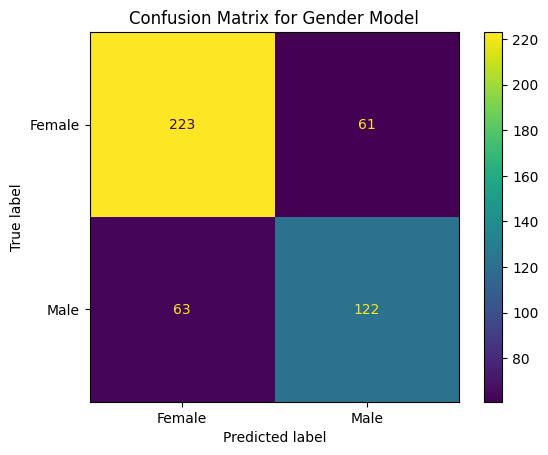

              precision    recall  f1-score   support

      Female       0.78      0.79      0.78       284
        Male       0.67      0.66      0.66       185

    accuracy                           0.74       469
   macro avg       0.72      0.72      0.72       469
weighted avg       0.74      0.74      0.74       469



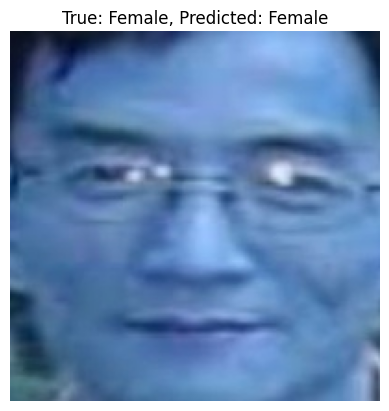

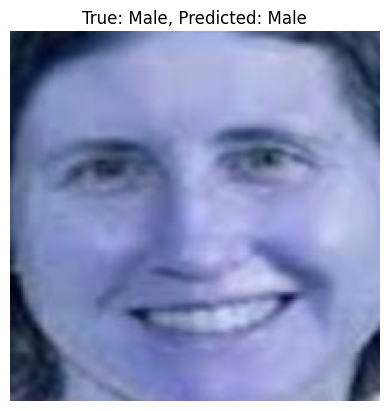

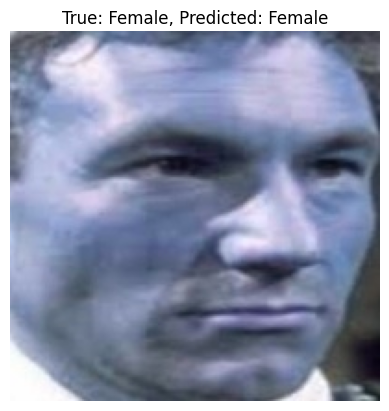

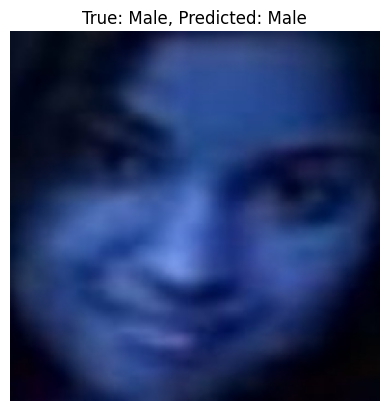

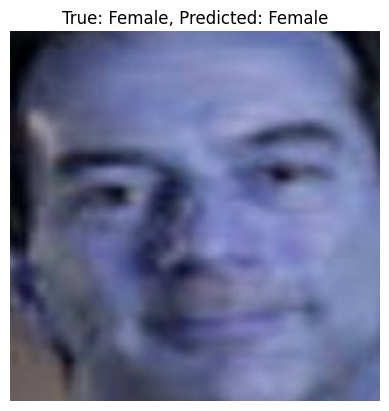

In [ ]:
print(f"Accuracy = {metrics.accuracy_score(y_test_gender, y_pred)}")

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_gender, y_pred, display_labels=["Female", "Male"])
plt.title("Confusion Matrix for Gender Model")
plt.show()

print(metrics.classification_report(y_test_gender, y_pred, target_names=["Female", "Male"]))


import matplotlib.pyplot as plt
import random

# Randomly select 5 images from the test set
indices = random.sample(range(len(x_test_gender)), 5)

for i in indices:
    plt.imshow(x_test_gender[i])
    plt.title(f"True: {'Male' if y_test_gender[i] else 'Female'}, Predicted: {'Male' if y_pred[i] else 'Female'}")
    plt.axis("off")
    plt.show()


In [ ]:
import os
import random
import shutil

# Set the source folder and target folder
source_folder = dataset_path
target_folder = '/content/drive/MyDrive/nikhil/Final_cut'

# Create the target folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# List all images in the source folder
all_images = os.listdir(source_folder)

# Separate the images by gender
female_images = [img for img in all_images if img.split('_')[1] == '1']
male_images = [img for img in all_images if img.split('_')[1] == '0']

# Select 10 random images for each gender
random_female_images = random.sample(female_images, 10)
random_male_images = random.sample(male_images, 10)

# Copy the selected images to the target folder
for img in random_female_images + random_male_images:
    shutil.copy(os.path.join(source_folder, img), os.path.join(target_folder, img))

print("10 random female and 10 random male images have been copied to the 'Final_cut' folder.")


10 random female and 10 random male images have been copied to the 'Final_cut' folder.


In [ ]:
import os
import cv2
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.models import load_model
import matplotlib.pyplot as plt

#######################################################################################################################
# Data Loading and Preprocessing
#######################################################################################################################
# Path to the dataset
path = '/content/drive/MyDrive/nikhil/Human_face'

# Initialize lists
ages = []
genders = []
images = []

# Read and preprocess images
for image in os.listdir(path):
    try:
        parts = image.split("_")
        if len(parts) < 2:
            continue

        # Extract age and gender
        age = int(parts[0])
        gender = int(parts[1])  # Gender: 1 = Male, 0 = Female

        # Read and resize the image
        image_data = cv2.imread(os.path.join(path, image))
        if image_data is None:
            continue
        image_data = cv2.resize(image_data, (200, 200))

        # Append to lists
        ages.append(age)
        genders.append(gender)
        images.append(image_data)
    except Exception as e:
        print(f"Error processing file {image}: {e}")

# Convert lists to NumPy arrays
ages = np.array(ages, dtype=np.int64)
genders = np.array(genders, dtype=np.uint8)
images = np.array(images, dtype=np.float32) / 255.0  # Normalize to [0, 1]

print(f"Processed {len(images)} images.")

# Split the data
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(
    images, genders, random_state=42
)

#######################################################################################################################
# Gender Prediction Model
#######################################################################################################################
def build_gender_model():
    model = Sequential()
    model.add(Conv2D(36, kernel_size=3, activation="relu", input_shape=(200, 200, 3)))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Conv2D(64, kernel_size=3, activation="relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Conv2D(128, kernel_size=3, activation="relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Conv2D(256, kernel_size=3, activation="relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Conv2D(512, kernel_size=3, activation="relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation="relu"))

    # Output layer for binary classification
    model.add(Dense(1, activation="sigmoid", name="gender"))

    # Compile the model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

#######################################################################################################################
# Compute Class Weights
#######################################################################################################################
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_gender),
    y=y_train_gender
)
class_weights = dict(enumerate(class_weights))
print(f"Class Weights: {class_weights}")

#######################################################################################################################
# Training the Model
#######################################################################################################################
gender_model = build_gender_model()

# Train the model with class weights
history = gender_model.fit(
    x_train_gender,
    y_train_gender,
    validation_data=(x_test_gender, y_test_gender),
    epochs=10,  # Use 10 epochs for testing; increase if needed
    class_weight=class_weights,
    batch_size=32
)

# Save the model
gender_model.save("gender_model_weighted.keras")

#######################################################################################################################
# Predictions and Evaluation
#######################################################################################################################
# Load the trained model
my_model = load_model("gender_model_weighted.keras", compile=False)

# Predict
predictions = my_model.predict(x_test_gender)
y_pred = (predictions >= 0.5).astype(int)[:, 0]

# Debugging: Print some sample predictions
for i in range(5):
    print(f"True: {y_test_gender[i]}, Predicted: {y_pred[i]}")

# Invert predictions if necessary
y_pred = 1 - y_pred

# Accuracy
accuracy = metrics.accuracy_score(y_test_gender, y_pred)
print(f"Corrected Accuracy = {accuracy}")

# Classification Report
report = metrics.classification_report(y_test_gender, y_pred, target_names=["Female", "Male"])
print(report)

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test_gender, y_pred)
print(f"Confusion Matrix:\n{confusion_matrix}")

#######################################################################################################################
# Visualize Training Performance
#######################################################################################################################
# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Processed 0 images.


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


Accuracy = 0.4


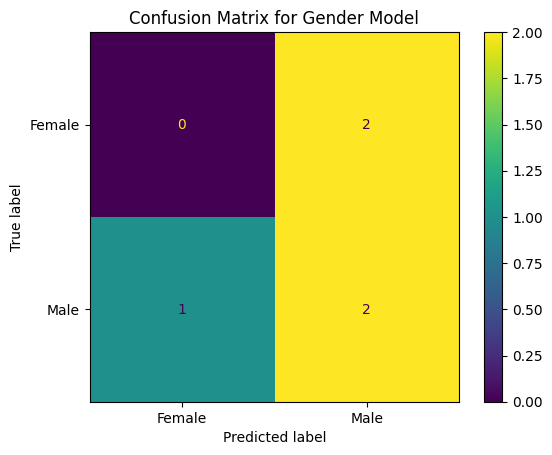

              precision    recall  f1-score   support

      Female       0.00      0.00      0.00         2
        Male       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



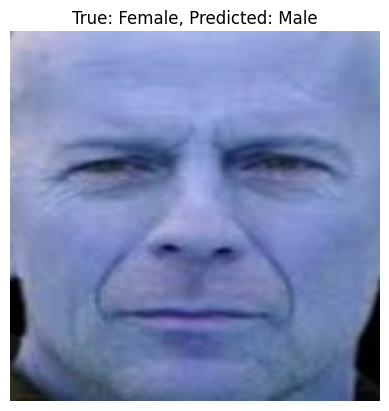

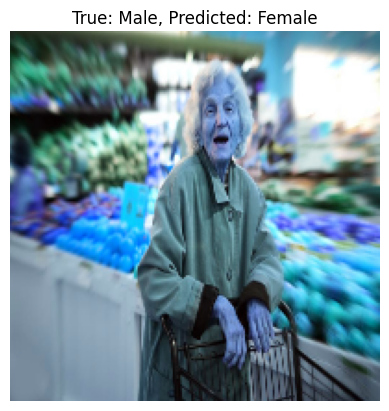

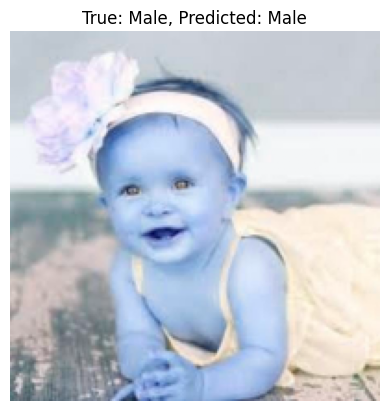

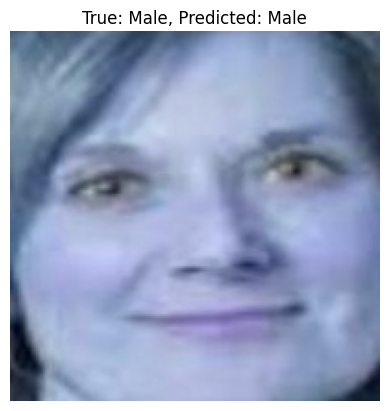

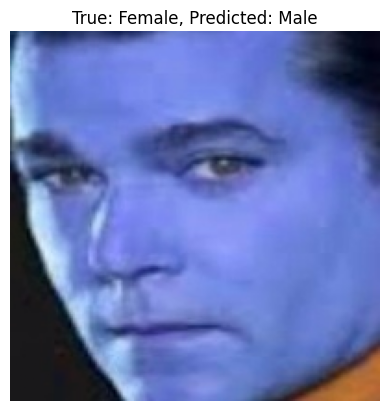

In [ ]:
print(f"Accuracy = {metrics.accuracy_score(y_test_gender, y_pred)}")

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_gender, y_pred, display_labels=["Female", "Male"])
plt.title("Confusion Matrix for Gender Model")
plt.show()

print(metrics.classification_report(y_test_gender, y_pred, target_names=["Female", "Male"]))


import matplotlib.pyplot as plt
import random

# Randomly select 5 images from the test set
indices = random.sample(range(len(x_test_gender)), 5)

for i in indices:
    plt.imshow(x_test_gender[i])
    plt.title(f"True: {'Male' if y_test_gender[i] else 'Female'}, Predicted: {'Male' if y_pred[i] else 'Female'}")
    plt.axis("off")
    plt.show()


In [ ]:
import os
import shutil

# Paths
dataset_dir = "/content/drive/MyDrive/nikhil/Human_face/"
output_dir = "/content/drive/MyDrive/nikhil/Human_face_organized/"
formats = ["jpg", "jpeg", "png"]

# Create folders for each format
for fmt in formats:
    os.makedirs(os.path.join(output_dir, fmt), exist_ok=True)

# Organize files by format
for file in os.listdir(dataset_dir):
    if file.endswith(tuple(formats)):
        file_path = os.path.join(dataset_dir, file)
        fmt = file.split('.')[-1]
        dest_path = os.path.join(output_dir, fmt, file)
        shutil.move(file_path, dest_path)

print(f"Files have been organized into {output_dir}")


Files have been organized into /content/drive/MyDrive/nikhil/Human_face_organized/


In [ ]:
import os
import shutil
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Paths
dataset_dir = "/content/drive/MyDrive/nikhil/Human_face_organized/"
output_dir = "/content/drive/MyDrive/nikhil/Human_face_preprocessed/"
image_size = (128, 128)  # Resize all images to 128x128 pixels

# Create directories for preprocessed images
os.makedirs(output_dir, exist_ok=True)
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to preprocess and save images
def preprocess_and_save_images(source_dir, destination_dir, image_size):
    images = []
    labels = []
    for category in os.listdir(source_dir):  # Iterate over categories (jpg, png, jpeg)
        category_dir = os.path.join(source_dir, category)
        if os.path.isdir(category_dir):
            for img_name in os.listdir(category_dir):
                img_path = os.path.join(category_dir, img_name)

                # Load and resize image
                img = load_img(img_path, target_size=image_size)
                img_array = img_to_array(img)

                # Normalize pixel values to [0, 1]
                img_array = img_array / 255.0

                images.append(img_array)
                labels.append(category)  # Assuming folder names represent the labels

    return np.array(images), np.array(labels)

# Preprocess images from all formats (jpg, jpeg, png)
images, labels = preprocess_and_save_images(dataset_dir, output_dir, image_size)

# Split dataset into train, validation, and test sets (80%, 10%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to save images to their respective directories
def save_images(images, labels, output_dir, set_name):
    set_dir = os.path.join(output_dir, set_name)
    for i, (img, label) in enumerate(zip(images, labels)):
        label_dir = os.path.join(set_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        img_path = os.path.join(label_dir, f"{set_name}_{i}.jpg")
        cv2.imwrite(img_path, img * 255.0)  # Convert back to 0-255 range for saving

# Save images into train, validation, and test sets
save_images(X_train, y_train, output_dir, 'train')
save_images(X_val, y_val, output_dir, 'val')
save_images(X_test, y_test, output_dir, 'test')

print("Dataset has been preprocessed and split into train, validation, and test sets.")


Dataset has been preprocessed and split into train, validation, and test sets.


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import

# Define directories
base_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/'
train_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/train/'
val_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/validation/'
test_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/test/'

# Create the directory structure if it doesn't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all image files in the original dataset directory
original_files = [f for f in os.listdir(base_dir) if f.endswith(('jpg', 'jpeg', 'png'))]
print(f"Total number of image files: {len(original_files)}")

# Check if we have enough files to split
if len(original_files) < 3:
    print("Not enough files to split into train, validation, and test sets.")
else:
    # Split the dataset into train, validation, and test sets (70%, 15%, 15%)
    train_files, test_files = train_test_split(original_files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

    print(f"Train: {len(train_files)} files")
    print(f"Validation: {len(val_files)} files")
    print(f"Test: {len(test_files)} files")

    # Move files to respective directories
    def move_files(file_list, destination_dir):
        for file in file_list:
            shutil.move(os.path.join(base_dir, file), os.path.join(destination_dir, file))

    move_files(train_files, train_dir)
    move_files(val_files, val_dir)
    move_files(test_files, test_dir)

# Apply data augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary',  # Assuming binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)


Total number of image files: 0
Not enough files to split into train, validation, and test sets.
Found 41 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
base_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/'
train_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/train/'
val_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/validation/'
test_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/test/'

# Create the directory structure if it doesn't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Check the base directory for image files
subdirectories = os.listdir(base_dir)
print(f"Subdirectories in the base directory: {subdirectories}")

# Check if there are files inside subdirectories (e.g., 'male', 'female' directories)
for subdir in subdirectories:
    full_path = os.path.join(base_dir, subdir)
    if os.path.isdir(full_path):
        print(f"Found subdirectory: {subdir}, with {len(os.listdir(full_path))} files")

# Now you can check whether the dataset needs splitting
# Assuming your dataset is already structured into subdirectories like 'male', 'female'
original_files = []
for subdir in subdirectories:
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        original_files += [os.path.join(subdir, f) for f in os.listdir(subdir_path) if f.endswith(('jpg', 'jpeg', 'png'))]

print(f"Total number of image files: {len(original_files)}")

# Ensure there are enough files for splitting
if len(original_files) < 3:
    print("Not enough files to split into train, validation, and test sets.")
else:
    # Reduce the split size since the dataset is small (e.g., 70%-30% split instead of 70%-15%-15%)
    train_files, test_files = train_test_split(original_files, test_size=0.4, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

    print(f"Train: {len(train_files)} files")
    print(f"Validation: {len(val_files)} files")
    print(f"Test: {len(test_files)} files")

    # Move files to respective directories
    def move_files(file_list, destination_dir):
        for file in file_list:
            shutil.move(os.path.join(base_dir, file), os.path.join(destination_dir, file))

    move_files(train_files, train_dir)
    move_files(val_files, val_dir)
    move_files(test_files, test_dir)

# Apply data augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary',  # Assuming binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)


Subdirectories in the base directory: ['train', 'test', 'validation']
Found subdirectory: train, with 1 files
Found subdirectory: test, with 1 files
Found subdirectory: validation, with 1 files
Total number of image files: 0
Not enough files to split into train, validation, and test sets.
Found 41 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Set directories for train, validation, and test sets
base_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/'  # Update path as needed
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Ensure all directories exist
for dir_path in [train_dir, validation_dir, test_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Verify directory structure
print("Subdirectories in the base directory:", os.listdir(base_dir))
print(f"Found subdirectory: train, with {len(os.listdir(train_dir))} files")
print(f"Found subdirectory: validation, with {len(os.listdir(validation_dir))} files")
print(f"Found subdirectory: test, with {len(os.listdir(test_dir))} files")

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Data preprocessing for validation and test sets (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=16,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,  # Reduce epochs due to small dataset
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Subdirectories in the base directory: ['train', 'test', 'validation']
Found subdirectory: train, with 1 files
Found subdirectory: validation, with 1 files
Found subdirectory: test, with 1 files
Found 41 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7885 - loss: 0.4595   

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/nikhil/Human_face_organized/validation/train/png/1 (55).png'

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set directories for train, validation, and test sets
base_dir = '/content/drive/MyDrive/nikhil/Human_face_organized/'  # Update path as needed
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Ensure all directories exist
for dir_path in [train_dir, validation_dir, test_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Verify directory structure
print("Subdirectories in the base directory:", os.listdir(base_dir))
print(f"Found subdirectory: train, with {len(os.listdir(train_dir))} files")
print(f"Found subdirectory: validation, with {len(os.listdir(validation_dir))} files")
print(f"Found subdirectory: test, with {len(os.listdir(test_dir))} files")

# Data preprocessing for training (with augmentation) and validation/test sets (without augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=16,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,  # Reduce epochs due to small dataset
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Get predictions from the model
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.round(predictions).astype(int)

# Get the true classes from the test generator
true_classes = test_generator.classes

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report (Precision, Recall, F1-Score)
print(classification_report(true_classes, predicted_classes))

# Save the trained model
model.save('face_recognition_model.h5')


with 500 images


abstract
introduction
literrature review
preprocessing steps
EDA
model


In [14]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
# Import necessary libraries for data handling, model building, and training
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import plot_model
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import shutil
from collections import defaultdict

In [16]:

# Paths to the source and target folders
all_images_path = '/content/drive/MyDrive/nikhil/data/all_images'
finalised_images_path = '/content/drive/MyDrive/nikhil/finalised_images'

# Ensure the target folder is created
os.makedirs(finalised_images_path, exist_ok=True)

# Dictionary to keep track of the count of images per age group
age_counts = defaultdict(int)

# Function to extract age from filename
def extract_age(filename):
    try:
        # Split the filename and extract the second segment as the age
        age = int(filename.split('_')[1])  # Assuming the age is the second part of the filename
        return age
    except (ValueError, IndexError):
        print(f"Could not extract age from filename: {filename}")
        return None

# Move up to 20 images per age group
for filename in os.listdir(all_images_path):
    image_path = os.path.join(all_images_path, filename)

    # Ensure the file exists
    if not os.path.isfile(image_path):
        print(f"File {image_path} does not exist, skipping.")
        continue

    # Extract age from the filename
    age = extract_age(filename)

    # Check if the image already exists in the target folder
    target_path = os.path.join(finalised_images_path, filename)
    if os.path.exists(target_path):
        print(f"File {target_path} already exists, skipping.")
        continue

    # Check and copy up to 20 images per age group
    if age is not None and age_counts[age] < 20:
        shutil.copy(image_path, target_path)  # Copy the image
        age_counts[age] += 1  # Increment count for this age

# Display the summary
for age, count in age_counts.items():
    print(f"Moved {count} images for age {age} to {finalised_images_path}")

print("Image selection and moving complete.")


File /content/drive/MyDrive/nikhil/finalised_images/26_1_4_20170117152504299.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/26_1_3_20170117174603671.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/26_1_3_20170117174605432.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/aligned_32_1_0_20170117182452621.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/aligned_32_1_0_20170117180018829.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/aligned_32_1_0_20170117185523010.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/26_1_3_20170117174556511.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/26_1_4_20170117152642036.jpg already exists, skipping.
File /content/drive/MyDrive/nikhil/finalised_images/aligned_32_1_0_20170117182456548.jpg already exists, skipping.
File 

In [ ]:
# Define the file path for the dataset
file_path = '/content/drive/MyDrive/nikhil/finalised_images'

# Initialize lists to store age, gender, and image paths
age, gender, img_path = [], [], []

# Parse filenames to extract age, gender, and image paths
for file in os.listdir(file_path):
    try:
        # Split the filename by underscores
        parts = file.split('_')

        # Extract age and gender based on known filename structure
        age.append(int(parts[1]))  # Age is the second element
        gender.append(int(parts[2]))  # Gender is the third element
        img_path.append(os.path.join(file_path, file))  # Full path to the image
    except (IndexError, ValueError) as e:
        print(f"Error processing file: {file}. Error: {e}")

# Create a DataFrame from the extracted data
df = pd.DataFrame({'age': age, 'gender': gender, 'img_path': img_path})

# Display the first few rows of the DataFrame for validation
print(df.head())


   age  gender                                           img_path
0   40       1  /content/drive/MyDrive/nikhil/finalised_images...
1    0       3  /content/drive/MyDrive/nikhil/finalised_images...
2    0       0  /content/drive/MyDrive/nikhil/finalised_images...
3    0       0  /content/drive/MyDrive/nikhil/finalised_images...
4   47       0  /content/drive/MyDrive/nikhil/finalised_images...


In [ ]:
df.head()


age  gender                                           img_path
0   40       1  /content/drive/MyDrive/nikhil/finalised_images...
1    0       3  /content/drive/MyDrive/nikhil/finalised_images...
2    0       0  /content/drive/MyDrive/nikhil/finalised_images...
3    0       0  /content/drive/MyDrive/nikhil/finalised_images...
4   47       0  /content/drive/MyDrive/nikhil/finalised_images...

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1235 non-null   int64 
 1   gender    1235 non-null   int64 
 2   img_path  1235 non-null   object
dtypes: int64(2), object(1)
memory usage: 29.1+ KB


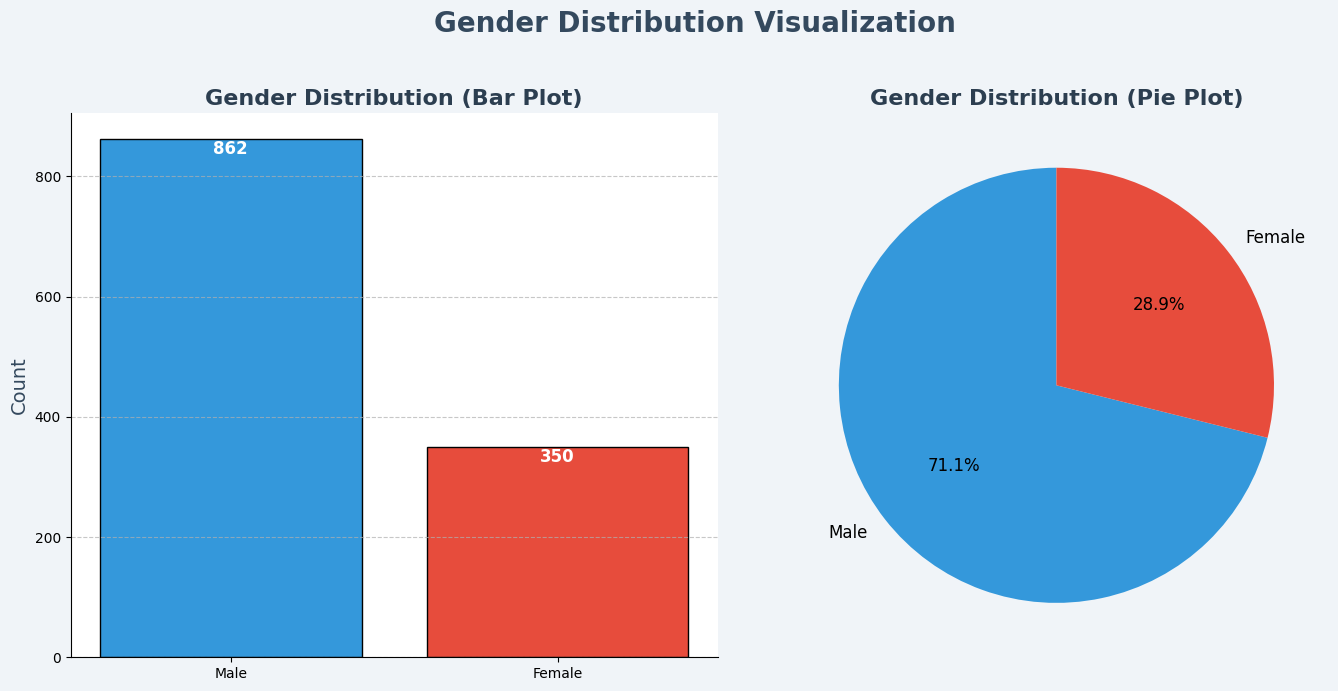

In [ ]:
# Assuming 'df' is your DataFrame with 'gender' column
male_count = df[df['gender'] == 0].shape[0]
female_count = df[df['gender'] == 1].shape[0]

# Set colors and style for visual appeal
bar_colors = ['#3498db', '#e74c3c']  # Blue for Male, Red for Female
pie_colors = ['#3498db', '#e74c3c']

# Create subplots with a unified theme
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='#f0f4f8')
fig.suptitle("Gender Distribution Visualization", fontsize=20, fontweight='bold', color="#34495e")

# Bar plot with enhancements
bars = axes[0].bar(['Male', 'Female'], [male_count, female_count], color=bar_colors, edgecolor='black')
axes[0].set_title('Gender Distribution (Bar Plot)', fontsize=16, fontweight='bold', color="#2c3e50")
axes[0].set_ylabel('Count', fontsize=14, color="#34495e")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add count values inside each bar
for bar, count in zip(bars, [male_count, female_count]):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 2,  # Position inside the bar
        f'{count}',
        ha='center',
        va='top',
        fontsize=12,
        fontweight='bold',
        color="white"  # White text for readability inside the bars
    )

# Pie plot with percentage labels and color scheme
labels = ['Male', 'Female']
sizes = [male_count, female_count]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=pie_colors, textprops={'fontsize': 12, 'color': "black"})
axes[1].set_title('Gender Distribution (Pie Plot)', fontsize=16, fontweight='bold', color="#2c3e50")

# Adjust layout for better spacing and visibility
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import os

def count_gender(image_dir):
    male_count = 0
    female_count = 0

    # List all files in the directory
    image_files = os.listdir(image_dir)

    for filename in image_files:
        # Split the filename to extract the gender label
        try:
            # Assuming the second number in the filename indicates gender
            gender = int(filename.split('_')[1])  # Adjust split logic based on filename format
            if gender == 0:
                male_count += 1
            elif gender == 1:
                female_count += 1
        except (IndexError, ValueError):
            print(f"Skipping invalid filename: {filename}")

    print(f"Path: {image_dir} - Males: {male_count}, Females: {female_count}")

# Example usage:
# Replace this with the path you want to analyze
path_to_analyze = '/content/drive/MyDrive/nikhil/finalised_images'
count_gender(path_to_analyze)


Path: /content/drive/MyDrive/nikhil/finalised_images - Males: 20, Females: 21


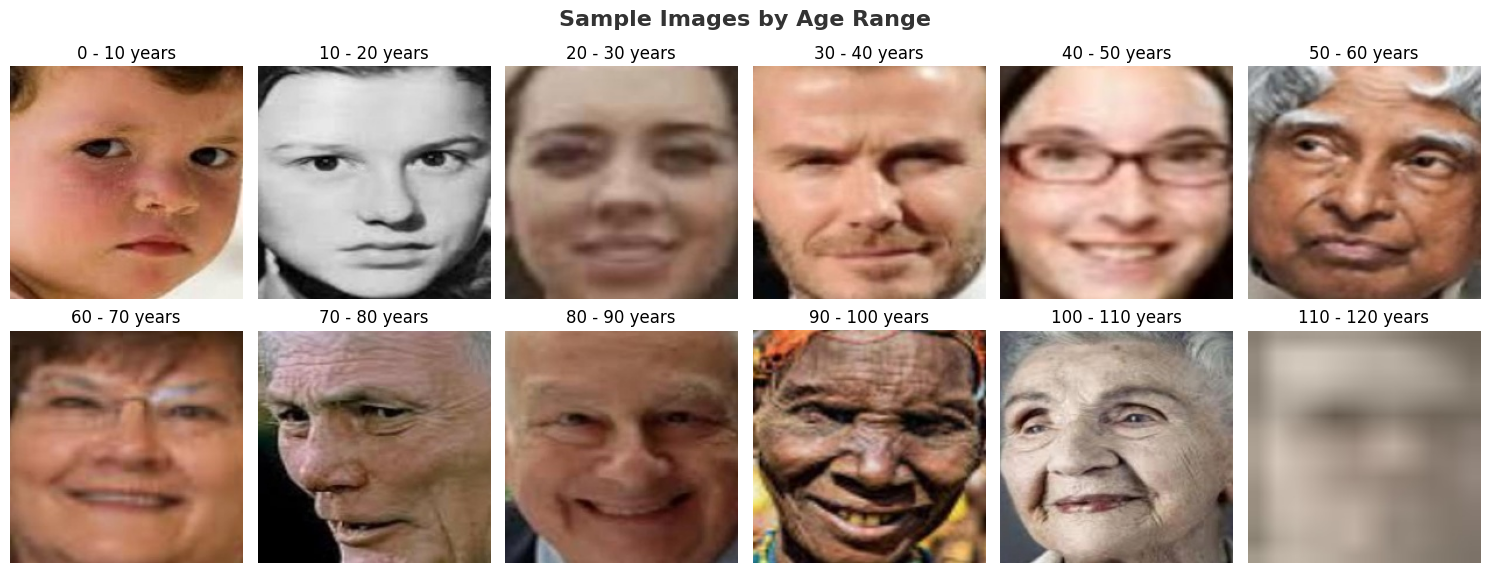

In [ ]:
# Assuming 'file_path' and 'df' are defined as in your previous code

# Create a list of average age ranges and corresponding image paths
age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100),(100,110),(110,120)]

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))
axs = axs.ravel()

for i, (min_age, max_age) in enumerate(age_ranges):
    # Filter dataframe for images within the age range
    subset_df = df[(df['age'] >= min_age) & (df['age'] < max_age)]
    if not subset_df.empty:
        # Select a random image from the age range
        random_img_path = subset_df.sample(1)['img_path'].values[0]
        img = Image.open(os.path.join(file_path, random_img_path))
        axs[i].imshow(img)
        axs[i].set_title(f"{min_age} - {max_age} years")
        axs[i].axis('off')
    else:
        axs[i].axis('off')

fig.suptitle("Sample Images by Age Range", fontsize=16, fontweight='bold', color="#333")
plt.tight_layout()
plt.show()

Male count (age > 100): 0
Female count (age > 100): 2


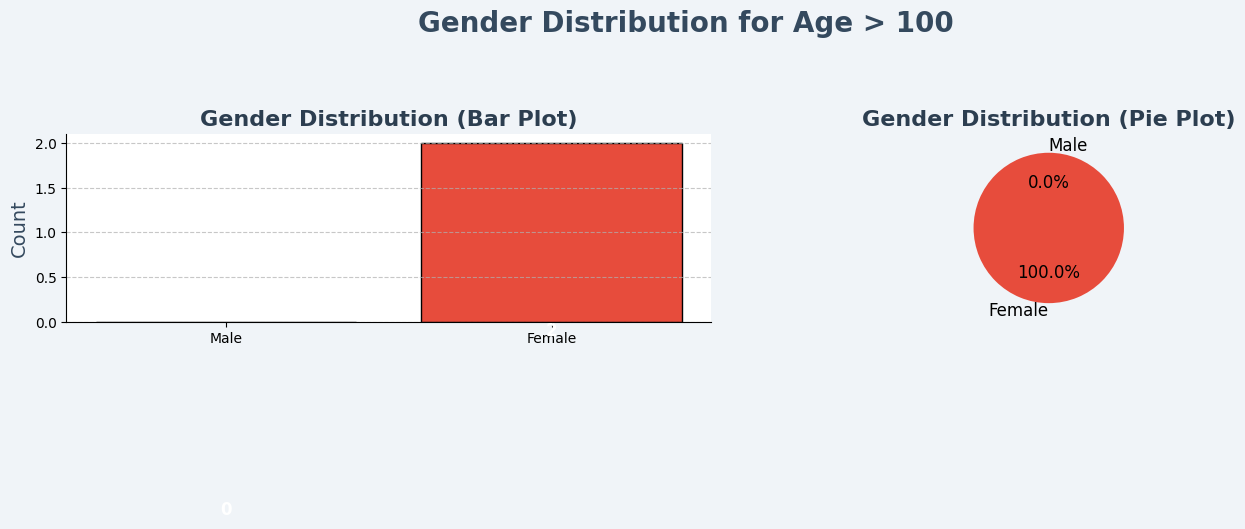

In [ ]:
# Filter the DataFrame for age > 100
over_100_df = df[df['age'] > 100]

# Count males and females in this filtered DataFrame
male_count_over_100 = over_100_df[over_100_df['gender'] == 0].shape[0]
female_count_over_100 = over_100_df[over_100_df['gender'] == 1].shape[0]

# Print counts
print(f"Male count (age > 100): {male_count_over_100}")
print(f"Female count (age > 100): {female_count_over_100}")

# Define colors for the plot
bar_colors = ['#3498db', '#e74c3c']  # Blue for Male, Red for Female
pie_colors = ['#3498db', '#e74c3c']

# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 14), facecolor='#f0f4f8')
fig.suptitle("Gender Distribution for Age > 100", fontsize=20, fontweight='bold', color="#34495e")

# Bar Plot with values inside the bars
bars = axes[0].bar(['Male', 'Female'], [male_count_over_100, female_count_over_100], color=bar_colors, edgecolor='black')
axes[0].set_title('Gender Distribution (Bar Plot)', fontsize=16, fontweight='bold', color="#2c3e50")
axes[0].set_ylabel('Count', fontsize=14, color="#34495e")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add count values inside each bar
for bar, count in zip(bars, [male_count_over_100, female_count_over_100]):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 2,  # Position inside the bar
        f'{count}',
        ha='center',
        va='top',
        fontsize=12,
        fontweight='bold',
        color="white"  # White color for contrast against dark bars
    )

# Pie Plot
labels = ['Male', 'Female']
sizes = [male_count_over_100, female_count_over_100]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=pie_colors, textprops={'fontsize': 12, 'color': "black"})
axes[1].set_title('Gender Distribution (Pie Plot)', fontsize=16, fontweight='bold', color="#2c3e50")

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Shuffle the data to ensure randomness and reset index
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=42)

In [ ]:
# Define data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Define rescaling for the testing data
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Define a custom generator function to process data in batches
def custom_generator(df, file_path, batch_size, datagen, class_weights=None):
    while True:
        # Shuffle the data for each epoch
        df_shuffled = df.sample(frac=1).reset_index(drop=True)
        for i in range(0, len(df), batch_size):
            batch_df = df_shuffled.iloc[i:i + batch_size]
            img_batch = []
            age_batch = []
            gender_batch = []
            for _, row in batch_df.iterrows():
                img_path = os.path.join(file_path, row['img_path'])
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img) / 255.0
                img_batch.append(img_array)
                age_batch.append(row['age'])
                gender_batch.append(row['gender'])

            img_batch = np.array(img_batch)
            age_batch = np.array(age_batch)
            gender_batch = np.array(gender_batch)

            # Apply class weights if provided
            if class_weights is not None:
                weights = np.array([class_weights.get(label, 1.0) for label in gender_batch])
            else:
                weights = np.ones_like(gender_batch)

            yield img_batch, {'age_out': age_batch, 'gender_out': gender_batch}, weights

In [ ]:
# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_model.trainable = True

# Freeze all layers except the last 4
for layer in vgg16_model.layers[:-4]:
    layer.trainable = False

# Flatten the output layer
output = vgg16_model.layers[-1].output
flatten = Flatten()(output)

# Age prediction branch
age_dense1 = Dense(units=126, activation='relu')(flatten)
age_dropout_layer = Dropout(rate=0.3)(age_dense1)
age_output = Dense(1, activation='linear', name='age_out')(age_dropout_layer)

# Gender prediction branch
gender_dense1 = Dense(units=256, activation='relu')(flatten)
gender_bn1 = BatchNormalization()(gender_dense1)
gender_dropout_layer = Dropout(rate=0.4)(gender_bn1)
gender_output = Dense(1, activation='sigmoid', name='gender_out')(gender_dropout_layer)

# Combine age and gender branches into a single model
model = Model(inputs=vgg16_model.input, outputs=[age_output, gender_output])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


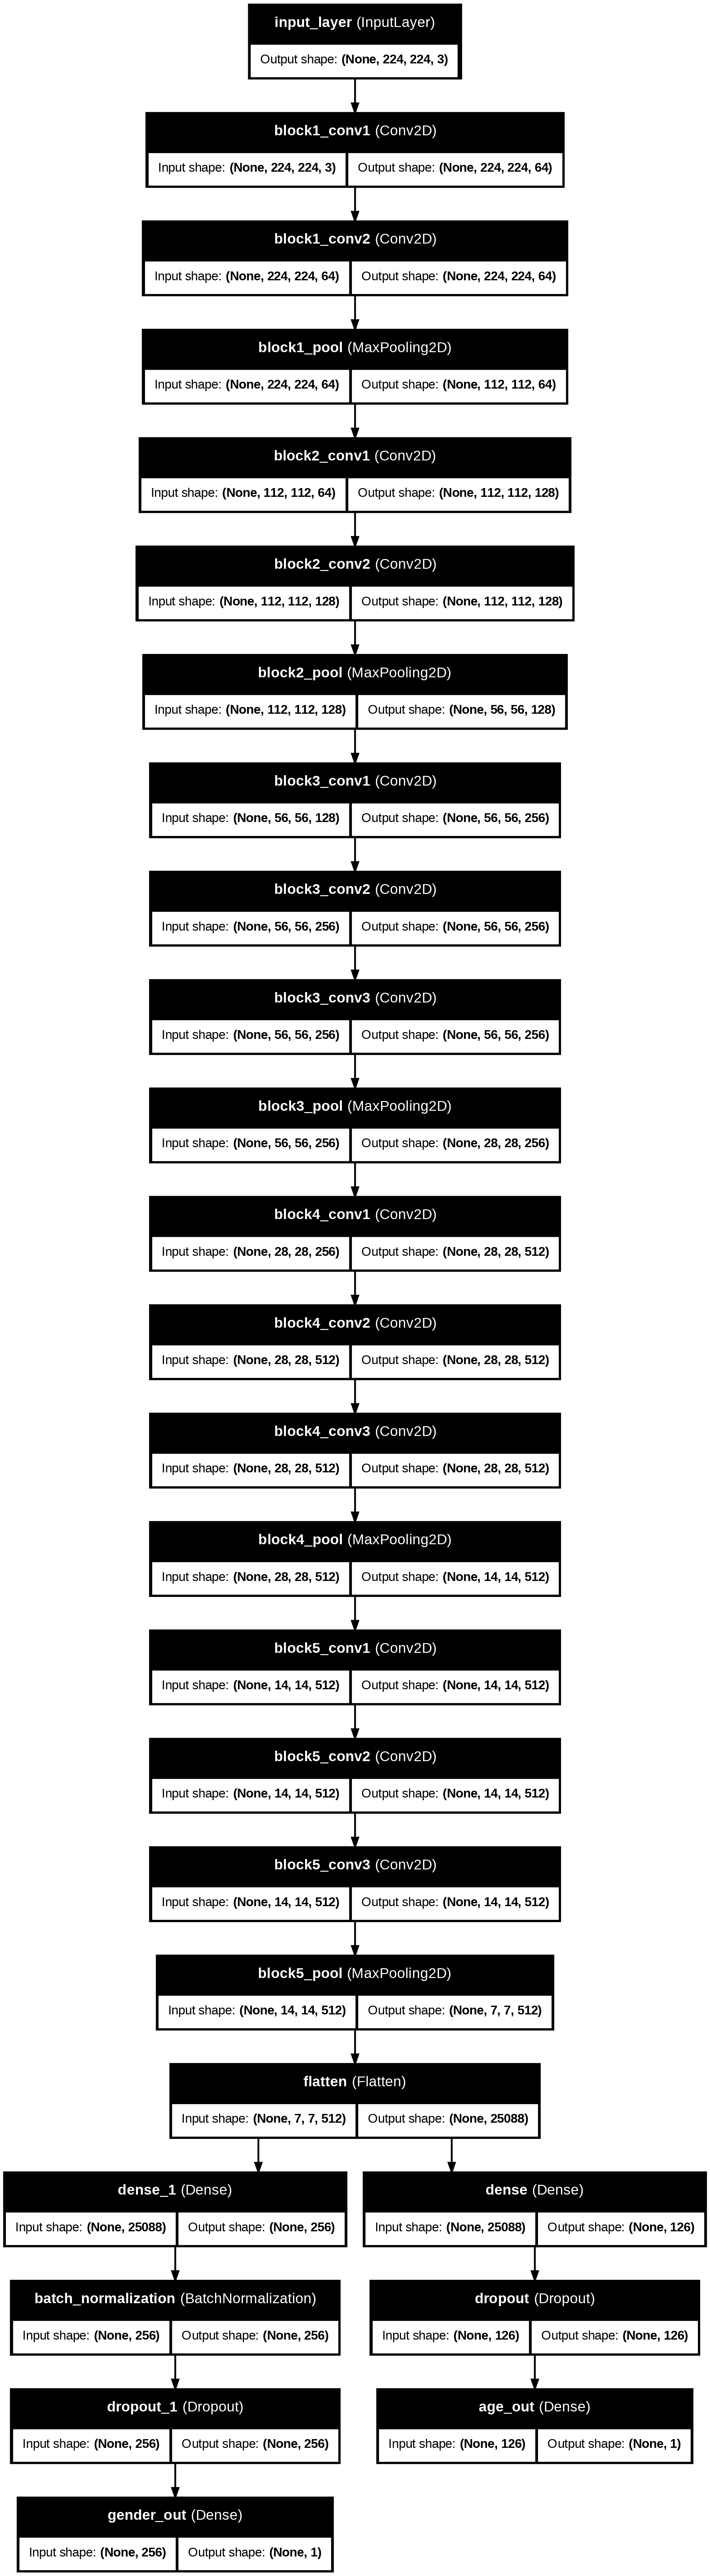

In [ ]:
# Save and plot the model structure
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [ ]:
# Compute class weights for the gender labels
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(df['gender']),
    y=df['gender']
)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
# Compile the model with Adam optimizer and multiple losses
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Fine-tune with a low learning rate
    loss={'age_out': 'mean_squared_error', 'gender_out': 'binary_crossentropy'},
    metrics={'age_out': 'mae', 'gender_out': 'accuracy'}
)

In [ ]:
# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

In [ ]:
# Define batch size and steps
batch_size = 32
steps_per_epoch = len(train_df) // batch_size
validation_steps = len(test_df) // batch_size

# Create training and validation generators
train_generator = custom_generator(train_df, file_path, batch_size, train_datagen, class_weights_dict)
test_generator = custom_generator(test_df, file_path, batch_size, test_datagen, None)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 804s 27s/step - age_out_loss: 743.0612 - age_out_mae: 33.2877 - gender_out_accuracy: 0.6499 - gender_out_loss: 0.2517 - loss: 743.3129 - val_age_out_loss: 439.3130 - val_age_out_mae: 17.3397 - val_gender_out_accuracy: 0.6786 - val_gender_out_loss: 1.4229 - val_loss: 440.7360 - learning_rate: 1.0000e-05
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 779s 26s/step - age_out_loss: 296.2769 - age_out_mae: 18.6259 - gender_out_accuracy: 0.6983 - gender_out_loss: 0.0250 - loss: 293.5278 - val_age_out_loss: 362.1146 - val_age_out_mae: 15.5597 - val_gender_out_accuracy: 0.6651 - val_gender_out_loss: 1.3941 - val_loss: 364.9764 - learning_rate: 1.0000e-05
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 780s 26s/step - age_out_loss: 236.4558 - age_out_mae: 16.5258 - gender_out_accuracy: 0.7327 - gender_out_loss: 0.0607 - loss: 235.9273 - val_age_out_loss: 414.6330 - val_age_out_mae: 16.7450 - val_gender_out_accuracy: 0.6930 - val_gender_out_loss: 1.7849 - val_loss: 416.7453 - 

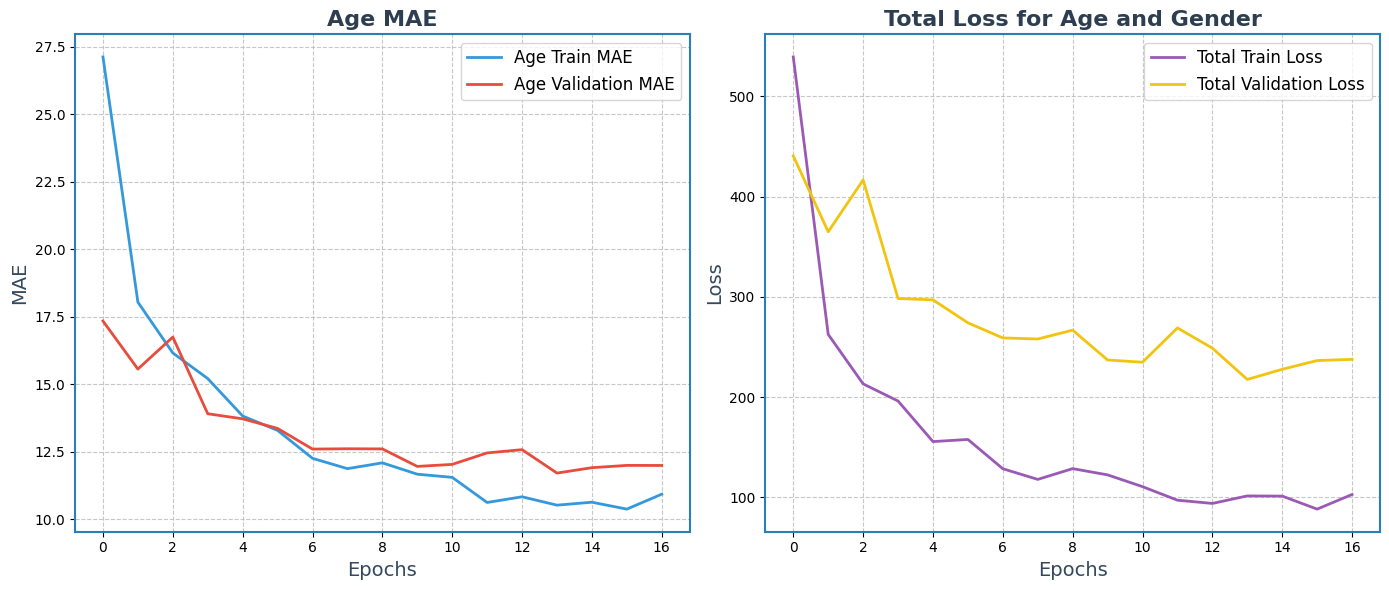

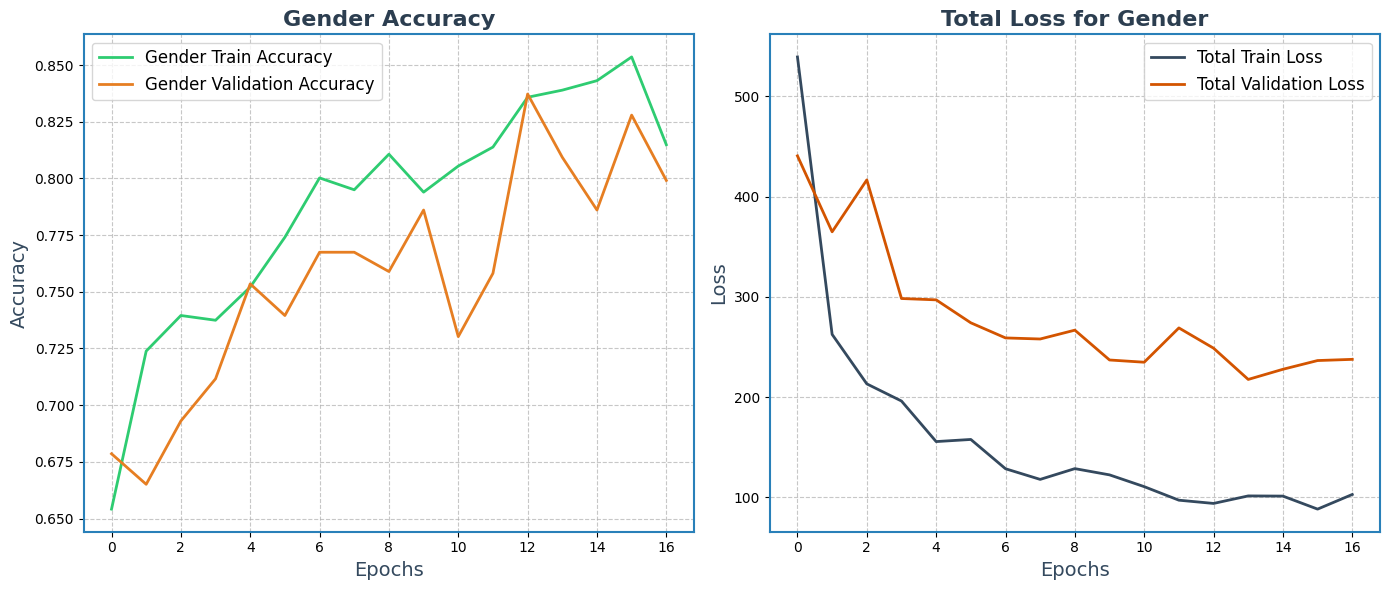

In [ ]:
# Function to style the plot
def style_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=16, fontweight='bold', color="#2c3e50")
    ax.set_xlabel(xlabel, fontsize=14, color="#34495e")
    ax.set_ylabel(ylabel, fontsize=14, color="#34495e")
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    for spine in ax.spines.values():
        spine.set_edgecolor('#2980b9')
        spine.set_linewidth(1.5)

# Plot training & validation MAE for age
plt.figure(figsize=(14, 6))

# Plot MAE for age prediction
ax1 = plt.subplot(1, 2, 1)
plt.plot(history.history['age_out_mae'], label='Age Train MAE', color='#3498db', linewidth=2)
plt.plot(history.history['val_age_out_mae'], label='Age Validation MAE', color='#e74c3c', linewidth=2)
style_plot(ax1, 'Age MAE', 'Epochs', 'MAE')

# Plot total loss for age prediction
ax2 = plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Total Train Loss', color='#9b59b6', linewidth=2)
plt.plot(history.history['val_loss'], label='Total Validation Loss', color='#f1c40f', linewidth=2)
style_plot(ax2, 'Total Loss for Age and Gender', 'Epochs', 'Loss')

plt.tight_layout()
plt.show()

# Plot accuracy for gender prediction
plt.figure(figsize=(14, 6))

# Plot accuracy for gender prediction
ax3 = plt.subplot(1, 2, 1)
plt.plot(history.history['gender_out_accuracy'], label='Gender Train Accuracy', color='#2ecc71', linewidth=2)
plt.plot(history.history['val_gender_out_accuracy'], label='Gender Validation Accuracy', color='#e67e22', linewidth=2)
style_plot(ax3, 'Gender Accuracy', 'Epochs', 'Accuracy')

# Plot combined loss for gender prediction
ax4 = plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Total Train Loss', color='#34495e', linewidth=2)
plt.plot(history.history['val_loss'], label='Total Validation Loss', color='#d35400', linewidth=2)
style_plot(ax4, 'Total Loss for Gender', 'Epochs', 'Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model after training
model.save('Age_gen.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Age: 52.91181945800781
Predicted Gender: Male


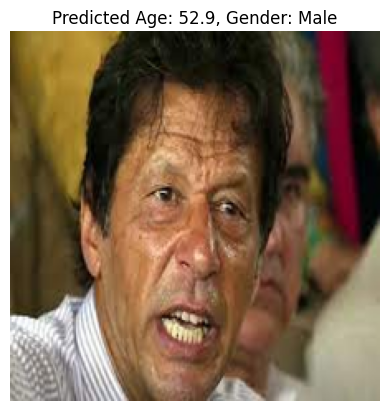

In [ ]:
# Load the trained model
model = load_model('Age_gen.h5')

# Function to preprocess the image
def preprocess_image(image):
    img_array = img_to_array(image) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to download image from URL
def download_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content)).resize((224, 224))  # Resize to match model input
    return image

# Example image URL
new_image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKUQ1IciYQfN5VeyGvE8-pCPp5A5paGc9g_UXITNa-oWYYRg4dSvd_-rigl6VA_6sYwxk&usqp=CAU'  # Change this to your image URL

# Download and preprocess the image
downloaded_image = download_image(new_image_url)
preprocessed_image = preprocess_image(downloaded_image)

# Make predictions
predictions = model.predict(preprocessed_image)

# Extract and print age and gender predictions
predicted_age = predictions[0][0][0]  # Age output
predicted_gender = predictions[1][0][0]  # Gender output (0 or 1)

# Convert gender prediction to label
gender_label = "Male" if predicted_gender >= 0 else "Female"

# Print predictions
print(f"Predicted Age: {predicted_age}")
print(f"Predicted Gender: {gender_label}")

# Display the image
plt.imshow(downloaded_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title(f"Predicted Age: {predicted_age:.1f}, Gender: {gender_label}")  # Add title with predictions
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Age: 25.5958251953125
Predicted Gender: Female


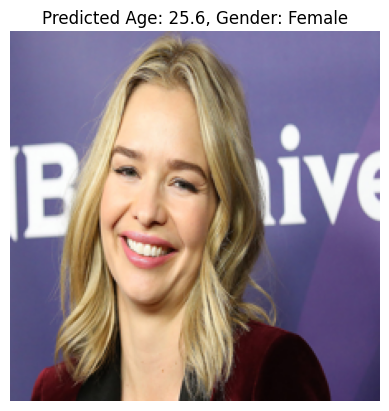

In [ ]:
# Load the trained model
model = load_model('Age_gen.h5')

# Function to preprocess the image
def preprocess_image(image):
    img_array = img_to_array(image) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to download image from URL
def download_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content)).resize((224, 224))  # Resize to match model input
    return image

# Example image URL
new_image_url = 'https://globalnews.ca/wp-content/uploads/2017/02/marissa-hermer.jpg?quality=85&strip=all'  # Change this to your image URL

# Download and preprocess the image
downloaded_image = download_image(new_image_url)
preprocessed_image = preprocess_image(downloaded_image)

# Make predictions
predictions = model.predict(preprocessed_image)

# Extract and print age and gender predictions
predicted_age = predictions[0][0][0]  # Age output
predicted_gender = predictions[1][0][0]  # Gender output (0 or 1)

# Convert gender prediction to label
gender_label = "Male" if predicted_gender >= 1 else "Female"

# Print predictions
print(f"Predicted Age: {predicted_age}")
print(f"Predicted Gender: {gender_label}")

# Display the image
plt.imshow(downloaded_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title(f"Predicted Age: {predicted_age:.1f}, Gender: {gender_label}")  # Add title with predictions
plt.show()

extra testing


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Age: 17.7
Predicted Gender: Male


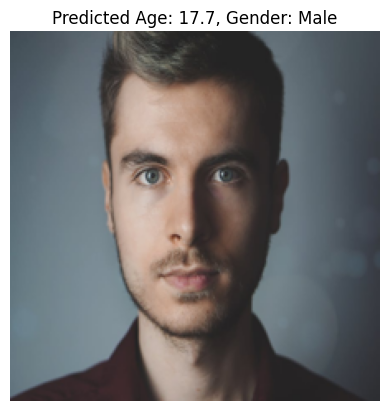

In [ ]:
# Import required libraries
import numpy as np
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('Age_gen.h5')

# Function to preprocess the image
def preprocess_image(image):
    """
    Preprocess the image for the model.
    - Normalize the image pixel values to [0, 1].
    - Resize the image to 224x224 (model input size).
    - Expand dimensions to match model input format.
    """
    img_array = img_to_array(image) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to download an image from a URL
def download_image(image_url):
    """
    Download an image from a URL with a User-Agent header to comply with access policies.
    - Resize the image to 224x224 (model input size).
    """
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    try:
        response = requests.get(image_url, headers=headers)
        response.raise_for_status()  # Raise an exception for HTTP errors
        image = Image.open(BytesIO(response.content)).resize((224, 224))  # Resize to match model input
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the image: {e}")
        return None
    except UnidentifiedImageError:
        print("The downloaded file is not a valid image.")
        return None

# Provide the random image URL
new_image_url = 'https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'  # Replace with your desired image URL

# Download and preprocess the image
downloaded_image = download_image(new_image_url)
if downloaded_image:
    preprocessed_image = preprocess_image(downloaded_image)

    # Make predictions using the model
    try:
        predictions = model.predict(preprocessed_image)

        # Extract and print age and gender predictions
        predicted_age = predictions[0][0][0]  # Age output
        predicted_gender = predictions[1][0][0]  # Gender output (0 for Female, 1 for Male)

        # Convert gender prediction to a readable label
        gender_label = "Male" if predicted_gender >= 0.5 else "Female"

        # Print predictions
        print(f"Predicted Age: {predicted_age:.1f}")
        print(f"Predicted Gender: {gender_label}")

        # Display the image with predictions
        plt.imshow(downloaded_image)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.title(f"Predicted Age: {predicted_age:.1f}, Gender: {gender_label}")  # Add title with predictions
        plt.show()
    except Exception as e:
        print(f"Error during prediction: {e}")
else:
    print("Failed to process the image.")
